## Stock market prediction and forecasting using LSTM by Ganesh Masurkar

####STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [95]:
### Keras and Tensorflow >2.0

In [96]:
### Data Collection
import pandas_datareader as pdr
key=""

In [97]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [98]:
df=pd.read_csv('AMZN.csv')

In [99]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/15/1997,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,5/16/1997,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,5/19/1997,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,5/20/1997,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,5/21/1997,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [100]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6252,3/18/2022,3136.260010,3231.879883,3120.219971,3225.010010,3225.010010,5141300
6253,3/21/2022,3222.419922,3261.679932,3191.060059,3229.830078,3229.830078,3326900
6254,3/22/2022,3236.110107,3323.340088,3233.979980,3297.780029,3297.780029,3204300
6255,3/23/2022,3274.100098,3327.399902,3253.739990,3268.159912,3268.159912,2790600
6256,3/24/2022,3274.989990,3282.370117,3201.000000,3272.989990,3272.989990,2834900


##STEP 2 : GATHERING INSIGHTS

In [101]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (6257, 7)


In [102]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6257 entries, 0 to 6256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6257 non-null   object 
 1   Open       6257 non-null   float64
 2   High       6257 non-null   float64
 3   Low        6257 non-null   float64
 4   Close      6257 non-null   float64
 5   Adj Close  6257 non-null   float64
 6   Volume     6257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 342.3+ KB


In [103]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6.257000e+03
mean,565.005651,571.345671,558.004657,564.817334,564.817334,7.270525e+06
std,918.112233,928.035683,906.961303,917.488221,917.488221,7.108549e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,39.009998,39.799999,38.360001,39.060001,39.060001,3.536500e+06
50%,105.930000,110.625000,101.500000,103.625000,103.625000,5.424200e+06
75%,596.140015,600.750000,588.299988,593.859985,593.859985,8.242900e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.043292e+08


In [104]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##Here you can see no null values in the dataset

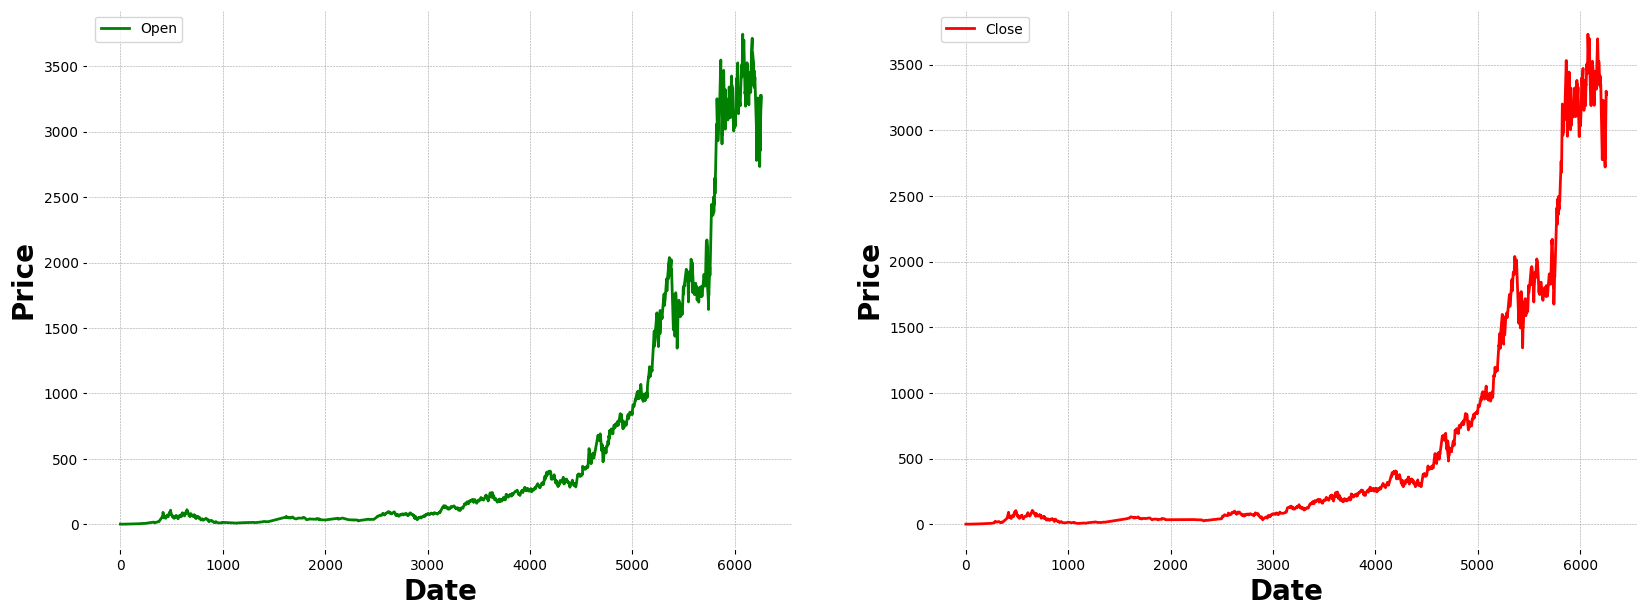

In [105]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=20)
ax[0].set_ylabel('Price',size=20)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=20)
ax[1].set_ylabel('Price',size=20)
ax[1].legend()

fig.show()

####mplfinance us for candlestick chart

In [108]:
pip install mplfinance

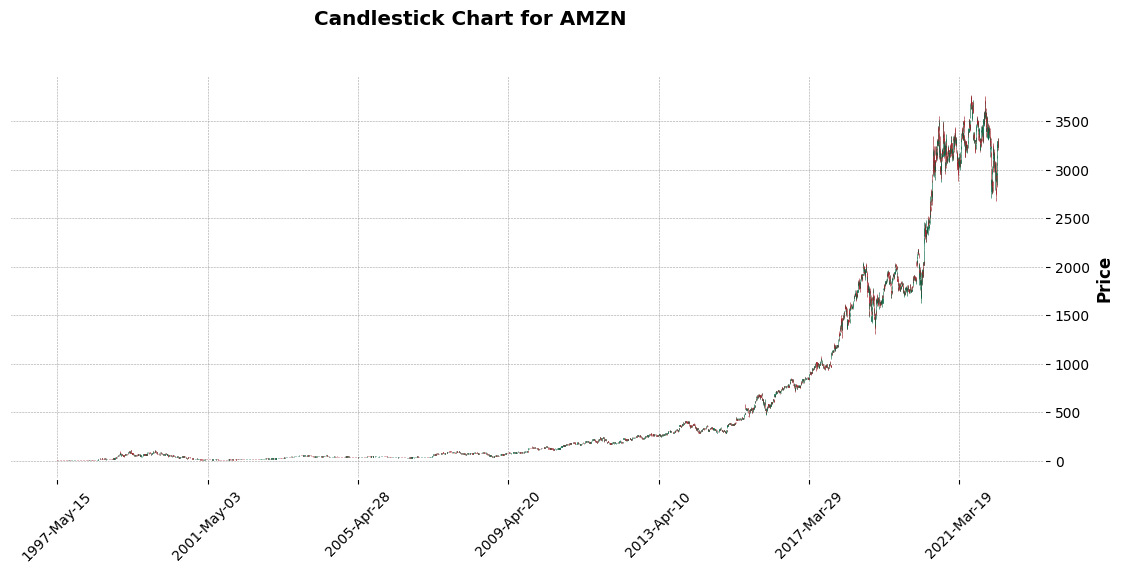

In [109]:
import pandas as pd
import mplfinance as mpf

# Load your DataFrame
df = pd.read_csv('AMZN.csv')

# Convert the 'Date' column to datetime and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create a new column 'Color' based on the price movement
df['Color'] = 'g'  # Default to green
df.loc[df['Close'] < df['Open'], 'Color'] = 'r'  # Change to red when close < open

# Plot the candlestick-like chart
mpf.plot(df, type='candle', style='charles', title='Candlestick Chart for AMZN', ylabel='Price', figratio=(10, 4), warn_too_much_data=999999)



In [110]:

# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

4693

In [111]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((4693, 7), (1564, 7))

In [112]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [113]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((4643, 50, 7), (4643, 7), (1514, 50, 7), (1514, 7))

##Data Preprocessing:


In [114]:
data = df[['Close']].values.astype(float)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[1.50803720e-04],
       [8.93653463e-05],
       [8.37798446e-05],
       ...,
       [8.83745778e-01],
       [8.75804758e-01],
       [8.77099681e-01]])

##STEP 4 : CREATING LSTM MODEL

In [115]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 50)            11600     
                                                                 
 dropout_2 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 31902 (124.62 KB)
Trainable params: 31902 (124.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Split Data into Train and Test Sets:


In [116]:
train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
test_size = len(data) - train_size
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]


##Create Sequences for LSTM:

In [117]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # You can adjust this value
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)


In [118]:
X_train

array([[[1.50803720e-04],
        [8.93653463e-05],
        [8.37798446e-05],
        ...,
        [5.02679068e-05],
        [3.63046887e-05],
        [2.93229456e-05]],

       [[8.93653463e-05],
        [8.37798446e-05],
        [6.42313929e-05],
        ...,
        [3.63046887e-05],
        [2.93229456e-05],
        [2.79267042e-05]],

       [[8.37798446e-05],
        [6.42313929e-05],
        [8.37798446e-06],
        ...,
        [2.93229456e-05],
        [2.79267042e-05],
        [3.07194551e-05]],

       ...,

       [[2.28126261e-01],
        [2.29375579e-01],
        [2.25683915e-01],
        ...,
        [2.29115534e-01],
        [2.34027045e-01],
        [2.34568604e-01]],

       [[2.29375579e-01],
        [2.25683915e-01],
        [2.26986855e-01],
        ...,
        [2.34027045e-01],
        [2.34568604e-01],
        [2.37303165e-01]],

       [[2.25683915e-01],
        [2.26986855e-01],
        [2.26804552e-01],
        ...,
        [2.34568604e-01],
        [2.3730

In [119]:
y_train

array([[2.79267042e-05],
       [3.07194551e-05],
       [2.23414706e-05],
       ...,
       [2.37303165e-01],
       [2.38635608e-01],
       [2.42742833e-01]])

In [120]:
y_test

array([[0.24146401],
       [0.24051764],
       [0.24289832],
       ...,
       [0.88374578],
       [0.87580476],
       [0.87709968]])

##Build and Train LSTM Model:

In [121]:
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, 1)),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=64)


Epoch 1/100
79/79 [==============================] - 4s 13ms/step - loss: 4.7577e-04
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 7.3762e-06
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 6.3878e-06
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 6.2858e-06
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 6.0374e-06
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 6.2686e-06
Epoch 7/100
79/79 [==============================] - 1s 9ms/step - loss: 6.3680e-06
Epoch 8/100
79/79 [==============================] - 1s 8ms/step - loss: 6.3685e-06
Epoch 9/100
79/79 [==============================] - 1s 8ms/step - loss: 5.9837e-06
Epoch 10/100
79/79 [==============================] - 1s 8ms/step - loss: 6.2254e-06
Epoch 11/100
79/79 [==============================] - 1s 8ms/step - loss: 5.7885e-06
Epoch 12/100
79/79 [==============================] - 1s 8ms/step - loss:

##Make Predictions:

In [122]:
predicted = model.predict(X_test)

39/39 [==============================] - 1s 5ms/step


##Inverse Transformations:

In [123]:
# If you scaled your data, you can inverse transform the predictions
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)


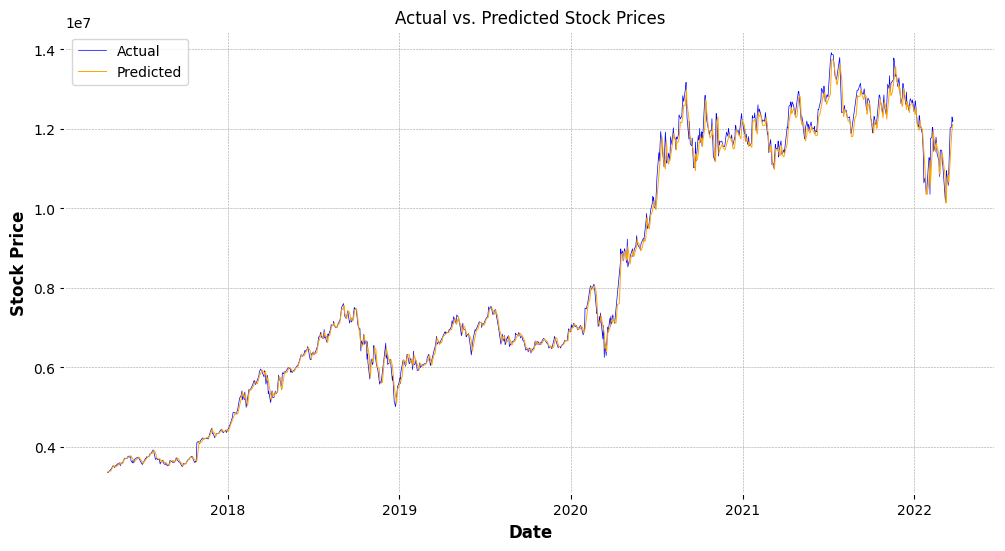

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained the model and made predictions
# 'predicted' contains the predicted stock prices, and 'y_test' contains the actual stock prices

# Inverse transform the predictions and actual values if you previously scaled the data
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

# Create a DataFrame for better visualization
df_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predicted.flatten()}, index=df.index[-len(y_test):])

# Plot the actual vs. predicted data with thinner lines
plt.figure(figsize=(12, 6))
plt.plot(df_predicted.index, df_predicted['Actual'], label='Actual', color='blue', linewidth=0.5)
plt.plot(df_predicted.index, df_predicted['Predicted'], label='Predicted', color='orange', linewidth=0.7)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()


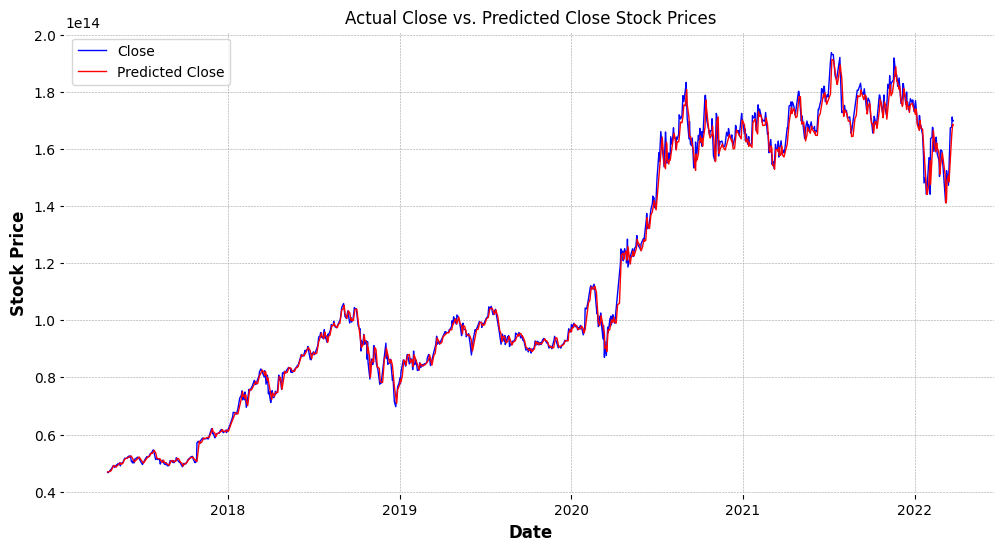

In [128]:
# Inverse transform the predictions and actual values if you previously scaled the data
predicted = scaler.inverse_transform(predicted)
y_test = scaler.inverse_transform(y_test)

# Create a DataFrame for better visualization
df_predicted = pd.DataFrame({'Close': y_test.flatten(), 'Predicted Close': predicted.flatten()}, index=df.index[-len(y_test):])

# Plot the actual 'Close' and 'Predicted Close' data with blue and red lines, respectively
plt.figure(figsize=(12, 6))
plt.plot(df_predicted.index, df_predicted['Close'], label='Close', color='blue', linewidth=1)
plt.plot(df_predicted.index, df_predicted['Predicted Close'], label='Predicted Close', color='red', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual Close vs. Predicted Close Stock Prices')
plt.legend()
plt.show()


In [126]:
len(data)

6257

Epoch 1/100
79/79 [==============================] - 4s 9ms/step - loss: 7.2131e-04
Epoch 2/100
79/79 [==============================] - 1s 8ms/step - loss: 6.8655e-06
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 7.5084e-06
Epoch 4/100
79/79 [==============================] - 1s 8ms/step - loss: 6.6121e-06
Epoch 5/100
79/79 [==============================] - 1s 8ms/step - loss: 6.4606e-06
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 6.2890e-06
Epoch 7/100
79/79 [==============================] - 1s 8ms/step - loss: 6.4827e-06
Epoch 8/100
79/79 [==============================] - 1s 8ms/step - loss: 6.5785e-06
Epoch 9/100
79/79 [==============================] - 1s 9ms/step - loss: 6.3539e-06
Epoch 10/100
79/79 [==============================] - 1s 8ms/step - loss: 6.4764e-06
Epoch 11/100
79/79 [==============================] - 1s 11ms/step - loss: 6.1896e-06
Epoch 12/100
79/79 [==============================] - 1s 12ms/step - loss

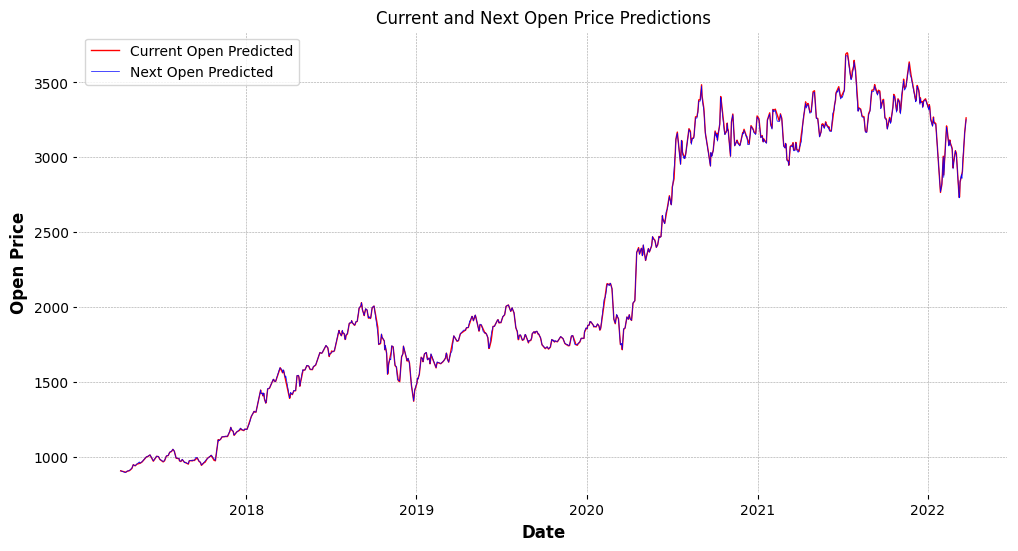

In [135]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

# Assuming you have loaded your data and performed preprocessing as before
# ...

# Define the sequence length and number of features
sequence_length = 10  # You can adjust this value
num_features = 1  # Assuming you are using only the 'Open' price as a feature

# Create sequences for the LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length:i + sequence_length + 1])
    return np.array(X), np.array(y)

X, y = create_sequences(data, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(sequence_length, num_features)),
    keras.layers.Dense(2)  # Two output neurons: one for the current open price and one for the next open price
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Make predictions
predicted = model.predict(X_test)

# Inverse transform the predictions
predicted = scaler.inverse_transform(predicted)

# Separate the predictions into current and next open prices
current_open_predictions = predicted[:, 0]
next_open_predictions = predicted[:, 1]

# Create a DataFrame for better visualization
df_predicted = pd.DataFrame({'Current Open Predicted': current_open_predictions, 'Next Open Predicted': next_open_predictions}, index=df.index[-len(current_open_predictions):])

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(df_predicted.index, df_predicted['Current Open Predicted'], label='Current Open Predicted', color='red', linewidth=1)
plt.plot(df_predicted.index, df_predicted['Next Open Predicted'], label='Next Open Predicted', color='blue', linewidth=0.5)
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Current and Next Open Price Predictions')
plt.legend()
plt.show()
